In [291]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
from tslearn.clustering import TimeSeriesKMeans
import pickle

mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.dpi'] = 90.

In [292]:
cases_state = pickle.load(open('pickle_files/cases_state.pkl', 'rb'))
ppl = pd.read_csv('dataset/static/population_moh.csv')

In [293]:
temp = cases_state.pivot(index='date', columns='state', values='cases_new')

In [294]:
temp.index = pd.to_datetime(temp.index)

In [295]:
df = temp.T.copy() 

In [296]:
ppl = ppl[1:] # remove malaysia total pupulation row

In [297]:
ppl = ppl.groupby('state')['pop'].sum()
ppl = pd.DataFrame(ppl)

In [298]:
df_pT =  df / ppl.loc[df.index].values * 100000

In [299]:
last_day = df.columns[-1]

In [300]:
df_pT.sort_values([last_day], ascending=False, axis=0, inplace=True)

In [301]:
df.sort_values([last_day], ascending=False, axis=0, inplace=True)

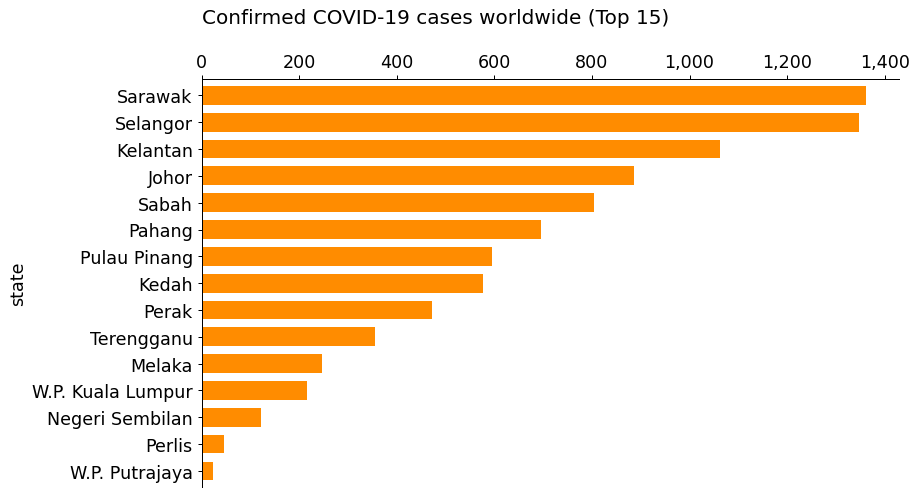

In [302]:
ax = df.iloc[:, -1].head(15).plot(kind='barh',
                                     figsize=(10, 6),
                                     width=0.7,
                                     color='darkorange')
ax.set_title('Confirmed COVID-19 cases worldwide (Top 15)\n', fontsize=16,loc='left')
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().invert_yaxis()
ax.xaxis.tick_top();

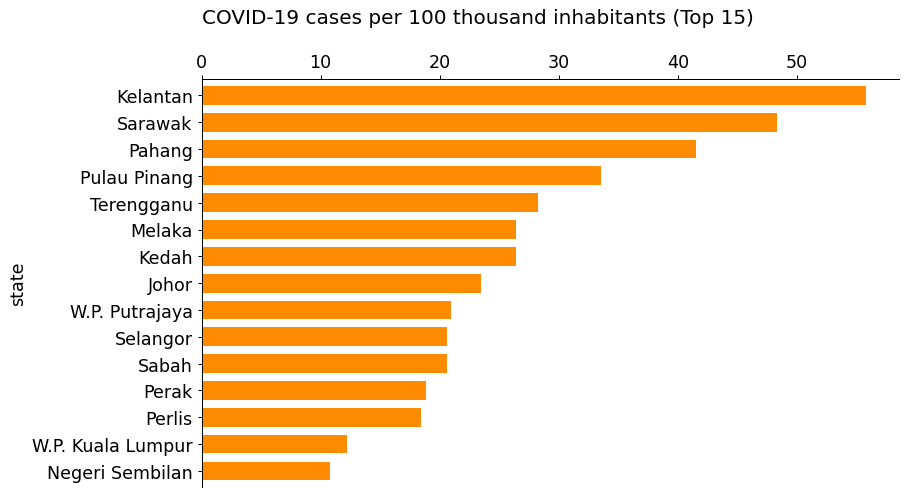

In [303]:
ax = df_pT.iloc[:, -1].head(15).plot(kind='barh',
                                        figsize=(10, 6),
                                        width=0.7,
                                        color='darkorange')
ax.set_title('COVID-19 cases per 100 thousand inhabitants (Top 15)\n', fontsize=16, loc='left')
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().invert_yaxis()
ax.xaxis.tick_top();

COVID-19 deaths vs time curves
18.936 --> 11.967 --> 11.967 --> 
blue cluster, N = 11
red cluster, N = 1
green cluster, N = 4


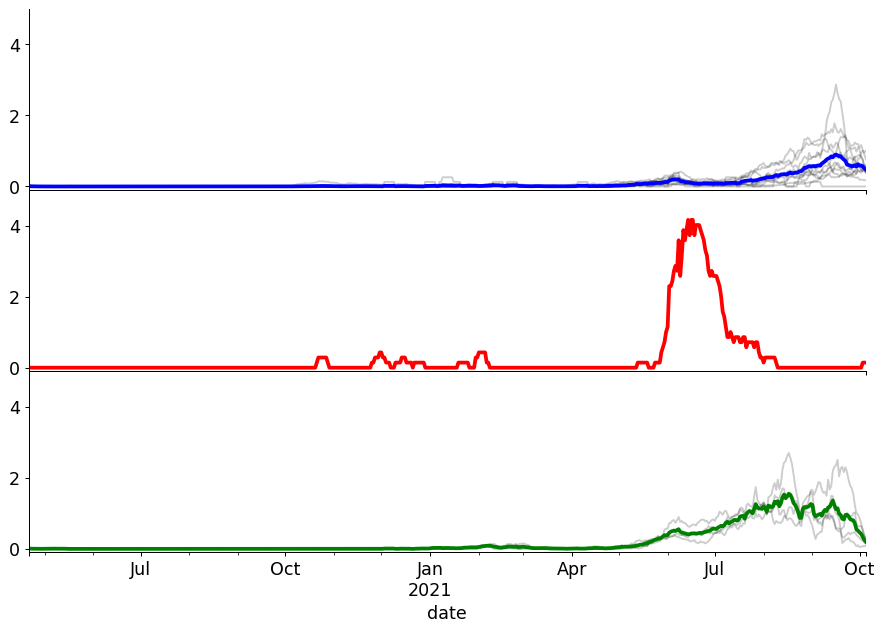

In [323]:
from tslearn.utils import to_time_series_dataset
cluster = 3
df = df_pT.iloc[:,35:]
X_train = df.rolling(7, axis=1, min_periods=1).mean().fillna(0)
colors = ['blue', 'red', 'green']
names = ['blue cluster','red cluster','green cluster']
seed = 1
np.random.seed(seed)
X_train = to_time_series_dataset(X_train.copy())

print('COVID-19 deaths vs time curves')
km = TimeSeriesKMeans(n_clusters=cluster, verbose=True, random_state=seed,
                         max_iter=10)

y_pred = km.fit_predict(X_train)
clusters = pd.Series(data=y_pred, index=df.index)

f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True,figsize=(12,8 ))

for yi,cl,xs in zip(range(cluster),[0,1,2],[ax1,ax2,ax3]):
    data = df.rolling(7, axis=1, min_periods=1).mean().fillna(0).loc[clusters[clusters == cl].index]
    data.T.plot(legend=False, alpha=.2,color='black', ax=xs)
    data.mean(axis=0).plot(linewidth=3., color=colors[cl], ax=xs)
    n = len(data)
    print('{}, N = {}'.format(names[cl], n))

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['right'].set_visible(False)

f.subplots_adjust(hspace=0)
plt.ylim(-0.10, 5)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

In [305]:
clusters

state
Kelantan             2
Sarawak              2
Pahang               2
Pulau Pinang         2
Terengganu           2
Melaka               0
Kedah                2
Johor                2
W.P. Putrajaya       0
Selangor             0
Sabah                2
Perak                2
Perlis               2
W.P. Kuala Lumpur    0
Negeri Sembilan      0
W.P. Labuan          1
dtype: int64

# ----------------------------------------This is a break line ----------------------------------

In [306]:
death_state = pickle.load(open('pickle_files/deaths_state.pkl', 'rb'))
ppl = pd.read_csv('dataset/static/population_moh.csv')

In [307]:
population = pd.read_csv('dataset/static/population_moh.csv')

In [308]:
temp = death_state.pivot(index='date', columns='state', values='deaths_new')

In [309]:
temp.index = pd.to_datetime(temp.index)

In [310]:
df = temp.T.copy()

In [311]:
ppl = ppl[1:]

In [312]:
ppl = ppl.groupby('state')['pop'].sum()
ppl = pd.DataFrame(ppl)

In [313]:
df_pT =  df / ppl.loc[df.index].values * 100000

In [314]:
last_day = df.columns[-1]

In [315]:
df_pT.sort_values([last_day], ascending=False, axis=0, inplace=True)

In [316]:
df.sort_values([last_day], ascending=False, axis=0, inplace=True)

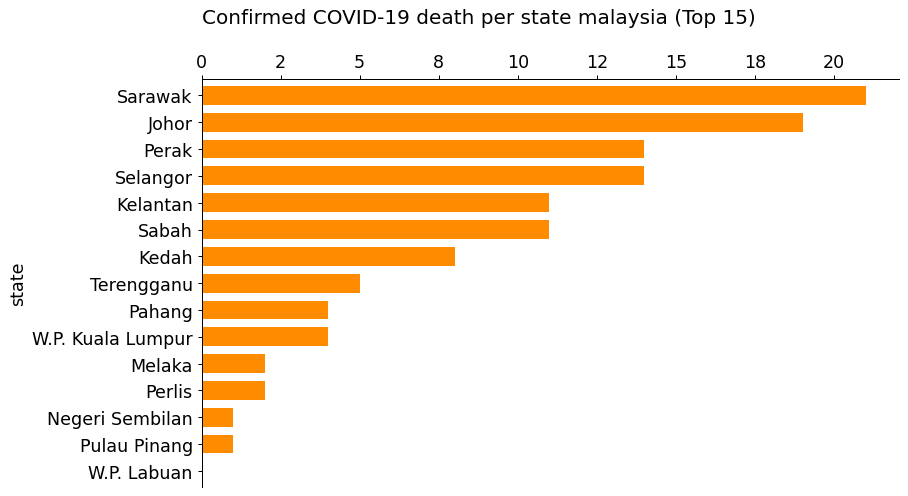

In [317]:
ax = df.iloc[:, -1].head(15).plot(kind='barh',
                                     figsize=(10, 6),
                                     width=0.7,
                                     color='darkorange')
ax.set_title('Confirmed COVID-19 death per state malaysia (Top 15)\n', fontsize=16,loc='left')
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().invert_yaxis()
ax.xaxis.tick_top();

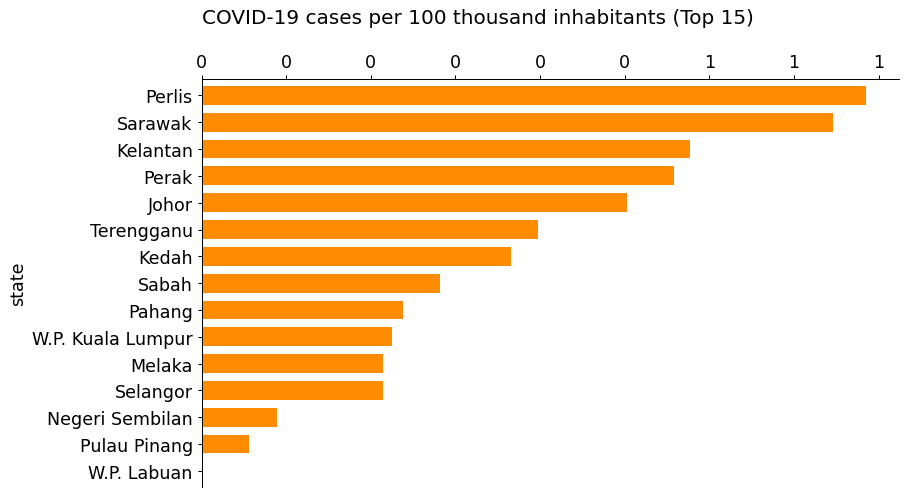

In [318]:
ax = df_pT.iloc[:, -1].head(15).plot(kind='barh',
                                        figsize=(10, 6),
                                        width=0.7,
                                        color='darkorange')
ax.set_title('COVID-19 cases per 100 thousand inhabitants (Top 15)\n', fontsize=16, loc='left')
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().invert_yaxis()
ax.xaxis.tick_top();

COVID-19 deaths vs time curves
18.936 --> 11.967 --> 11.967 --> 
0
2
2
green cluster, N = 4
1
1
1
red cluster, N = 1
2
0
0
blue cluster, N = 11


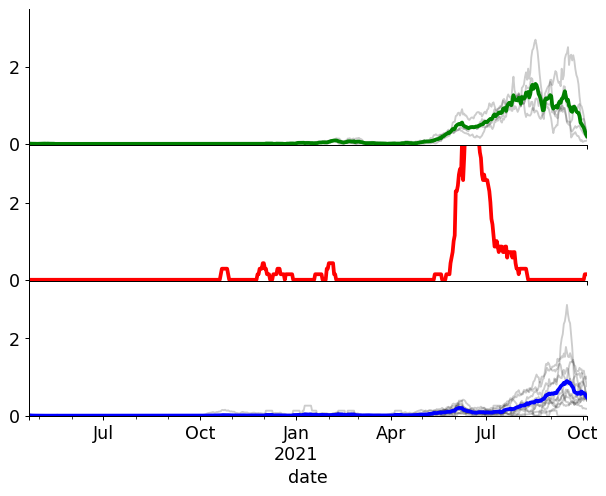

In [319]:
from tslearn.utils import to_time_series_dataset
cluster = 3
df = df_pT.iloc[:,35:]
X_train = df.rolling(7, axis=1, min_periods=1).mean().fillna(0)
colors = ['blue', 'red', 'green']
names = ['blue cluster','red cluster','green cluster']
seed = 1
np.random.seed(seed)
X_train = to_time_series_dataset(X_train.copy())

print('COVID-19 deaths vs time curves')
km = TimeSeriesKMeans(n_clusters=cluster, verbose=True, random_state=seed,
                         max_iter=10)

y_pred = km.fit_predict(X_train)
clusters = pd.Series(data=y_pred, index=df.index)

f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True,figsize=(8, 6))

for yi,cl,xs in zip(range(cluster),[2,1,0],[ax1,ax2,ax3]):
    print(yi)
    print(cl)
    print(cl)
    data = df.rolling(7, axis=1, min_periods=1).mean().fillna(0).loc[clusters[clusters == cl].index]
    data.T.plot(legend=False, alpha=.2,color='black', ax=xs)
    data.mean(axis=0).plot(linewidth=3., color=colors[cl], ax=xs)
    n = len(data)
    print('{}, N = {}'.format(names[cl], n))

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['right'].set_visible(False)

f.subplots_adjust(hspace=0)
plt.ylim(-0.02, 3.5)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

In [320]:
clusters

state
Perlis               0
Sarawak              0
Kelantan             0
Perak                0
Johor                0
Terengganu           0
Kedah                0
Sabah                0
Pahang               0
W.P. Kuala Lumpur    2
Melaka               2
Selangor             2
Negeri Sembilan      2
Pulau Pinang         0
W.P. Labuan          1
W.P. Putrajaya       0
dtype: int64

In [321]:
death_state

,date,state,deaths_new,deaths_bid,deaths_new_dod,deaths_bid_dod,deaths_pvax,deaths_fvax,deaths_tat
0,2020-03-17,Johor,1,0,1,0,0,0,0
1,2020-03-17,Kedah,0,0,0,0,0,0,0
2,2020-03-17,Kelantan,0,0,0,0,0,0,0
3,2020-03-17,Melaka,0,0,0,0,0,0,0
4,2020-03-17,Negeri Sembilan,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
9083,2021-10-05,Selangor,14,2,0,0,0,0,4
9084,2021-10-05,Terengganu,5,0,1,0,0,0,3
9085,2021-10-05,W.P. Kuala Lumpur,4,1,0,0,0,0,2
9086,2021-10-05,W.P. Labuan,0,0,0,0,0,0,0
